<img src="datamecum_logo.png" align="right" style="float" width="400">
<font color="#CA3532"><h1 align="left">Programa técnico intensivo en data science. Datamecum.</h1></font>
<font color="#6E6E6E"><h2 align="left">Decision Trees</h2></font> 
<font color="#6E6E6E"><h2 align="left">Podado del árbol</h2></font>

### Carga de datos

In [12]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, classification_report

In [13]:
EPS = 10 ** -6

In [14]:
DATA_DIR = os.path.join(".", "data")
TRAIN_CSV_PATH = os.path.join(DATA_DIR, "train.csv")
TEST_CSV_PATH = os.path.join(DATA_DIR, "test.csv")
CLASS_NAMES_PATH = os.path.join(DATA_DIR, "class_names.joblib")

In [15]:
train_df = pd.read_csv(TRAIN_CSV_PATH)
train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,...,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399,1
1,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.125900,0.1724,0.06053,...,25.07,146.00,1479.0,0.1665,0.29420,0.53080,0.21730,0.3032,0.08075,0
2,10.66,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.000000,0.1928,0.05975,...,19.20,73.20,408.3,0.1076,0.06791,0.00000,0.00000,0.2710,0.06164,1
3,13.56,13.90,88.59,561.3,0.10510,0.11920,0.07860,0.044510,0.1962,0.06303,...,17.13,101.10,686.6,0.1376,0.26980,0.25770,0.09090,0.3065,0.08177,1
4,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.021730,0.2013,0.05955,...,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.032630,0.1727,0.06317,...,28.03,113.80,973.1,0.1301,0.32990,0.36300,0.12260,0.3175,0.09772,0
451,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.106200,0.1792,0.06552,...,26.24,171.10,2053.0,0.1495,0.41160,0.61210,0.19800,0.2968,0.09929,0
452,15.46,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.085200,0.1807,0.07083,...,36.33,117.70,909.4,0.1732,0.49670,0.59110,0.21630,0.3013,0.10670,0
453,17.05,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.109000,0.2131,0.06325,...,24.89,133.50,1189.0,0.1703,0.39340,0.50180,0.25430,0.3109,0.09061,0


In [16]:
X_train = train_df.drop("target", axis=1).values
y_train = train_df["target"].values

In [17]:
test_df = pd.read_csv(TEST_CSV_PATH)
X_test = test_df.drop("target", axis=1).values
y_test = test_df["target"].values

In [18]:
feature_names = test_df.drop("target", axis=1).columns

In [19]:
class_names = joblib.load(CLASS_NAMES_PATH)

### Construcción de un árbol completo utilizadon Sklearn

In [20]:
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
plt.figure(figsize=(4, 4), dpi=1000)
plot_tree(full_tree, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [22]:
print(full_tree.get_depth())
print(full_tree.get_n_leaves())

7
19


#### Evaluación del modelo

In [24]:
print(classification_report(y_test, full_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



### Best Minimum Samples at Leaf Tree

In [25]:
min_samples_leaf_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    scoring=make_scorer(accuracy_score),
    param_grid=ParameterGrid(
        {
            "min_samples_leaf": [
                [min_samples_leaf] for min_samples_leaf in np.arange(EPS, 0.5, 0.025)
            ]
        }
    ),
)

In [26]:
min_samples_leaf_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x7f775b79ad90>,
             scoring=make_scorer(accuracy_score))

In [27]:
min_samples_leaf_grid_search.best_params_

{'min_samples_leaf': 0.025001000000000002}

In [28]:
best_min_samples_leaf_tree = min_samples_leaf_grid_search.best_estimator_

In [29]:
print(best_min_samples_leaf_tree.get_depth())
print(best_min_samples_leaf_tree.get_n_leaves())

5
9


In [ ]:
plt.figure(figsize=(4, 4), dpi=1000)
plot_tree(
    best_min_samples_leaf_tree,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
)
plt.show()

In [31]:
print(classification_report(y_test, best_min_samples_leaf_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Best Minimum Samples at Split Tree

In [32]:
min_samples_split_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    scoring=make_scorer(accuracy_score),
    param_grid=ParameterGrid(
        {
            "min_samples_split": [
                [min_samples_split] for min_samples_split in np.arange(EPS, 1, 0.025)
            ]
        }
    ),
)

In [33]:
min_samples_split_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x7f775003af40>,
             scoring=make_scorer(accuracy_score))

In [34]:
min_samples_split_grid_search.best_params_

{'min_samples_split': 0.07500100000000001}

In [35]:
best_min_samples_split_tree = min_samples_split_grid_search.best_estimator_

In [36]:
print(best_min_samples_split_tree.get_depth())
print(best_min_samples_split_tree.get_n_leaves())

6
9


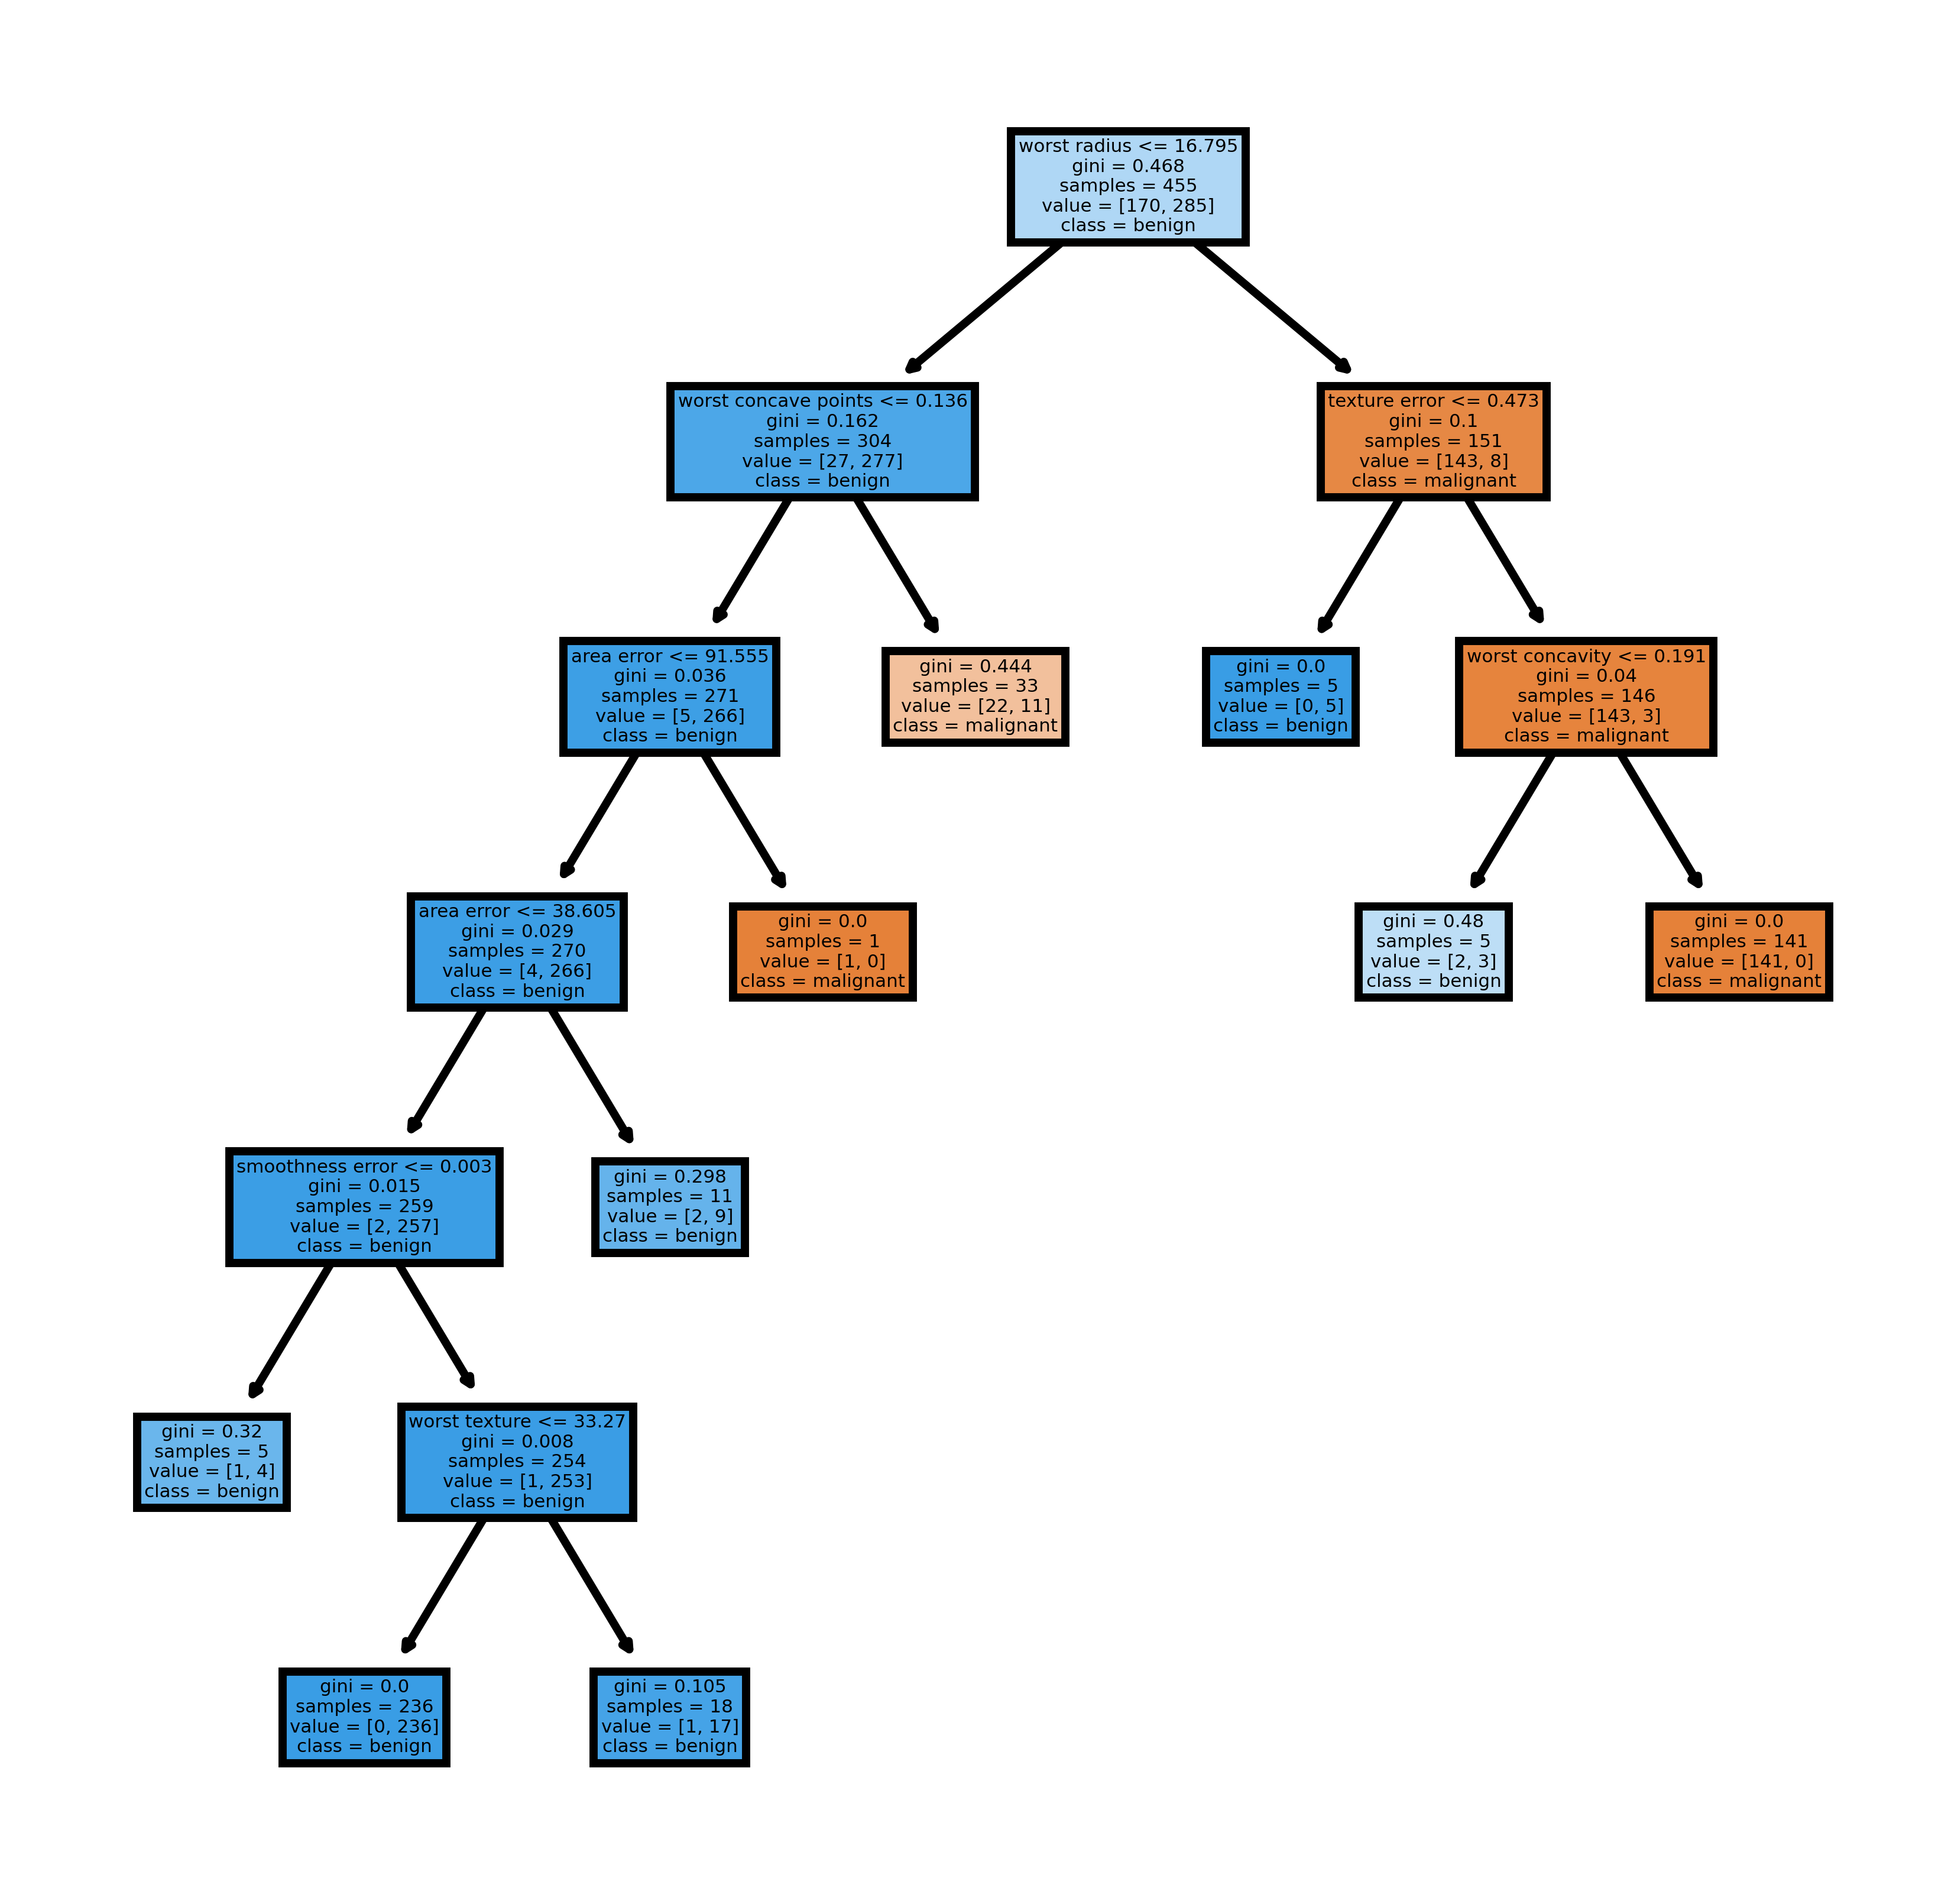

In [37]:
plt.figure(figsize=(4, 4), dpi=1000)
plot_tree(
    best_min_samples_split_tree,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
)
plt.show()

In [38]:
print(classification_report(y_test, best_min_samples_split_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        42
           1       0.95      0.88      0.91        72

    accuracy                           0.89       114
   macro avg       0.88      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114

